![](https://images.pexels.com/photos/206563/pexels-photo-206563.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=500)

# Background

Kevin J. Walchko, Phd

31 May 2019

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import IPython
# from IPython.display import HTML

In [3]:
import pylab                                 
pylab.rcParams['figure.figsize'] = (10.0, 18.0)

In [4]:
# from pathlib import Path
!ls

finding-the-background.ipynb movie.mp4


In [5]:
IPython.display.Video("./movie.mp4", width=200)

In [6]:
src = cv2.VideoCapture('movie.mp4')
print("movie status:", src.isOpened())

movie status: True


In [7]:
mov = []
try:
    while True:
        ret, img = src.read()
        if ret:
            mov.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            print(f"*** {ret} ***")
            break
except Exception as e:
    print(e)
    src.release()
    
print(f">> Found {len(mov)} frames")

*** False ***
>> Found 570 frames


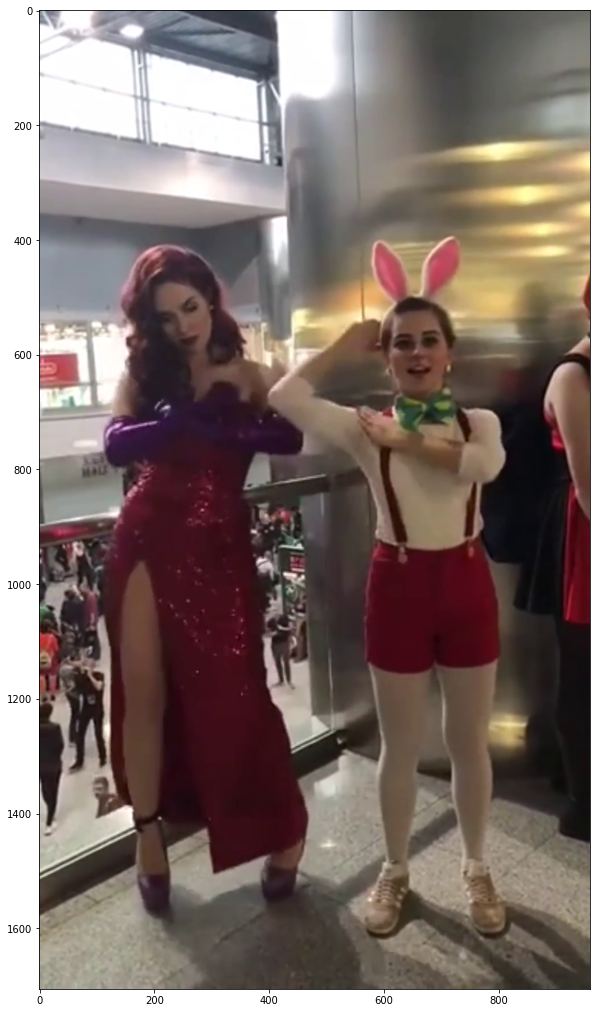

In [8]:
plt.imshow(mov[100]);

In [9]:
def MOG2(frames):
    # this function takes in an array of images from the cv2.VideoCapture() which is either
    # a camera or a video (i.e., mp4) and runs through the images performing background
    # subtraction
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgbg.setDetectShadows(False)
    
    ret = []

    for frame in frames:
        # find the change
        fgmask = fgbg.apply(frame)
        # clean up the image
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
        erode = cv2.erode(fgmask, None, iterations=1)
        dilate = cv2.dilate(erode, None, iterations=3)
        ret.append(dilate)
    return ret

masks = MOG2(mov)

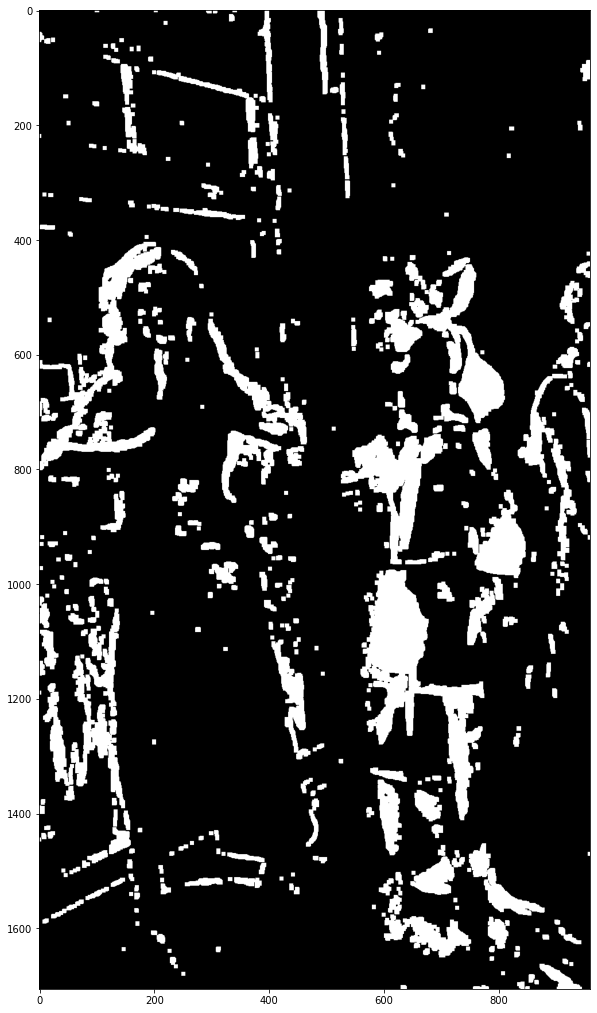

In [10]:
plt.imshow(masks[200], cmap="gray");

In [ ]:
def maskout(imgs, masks):
    ret = []
    for i,m in zip(imgs, masks):
        m = mask_inv = cv2.bitwise_not(m)